Load packages, load data, and check that data is the correct size. For neural nets, the data should always be scaled, as the models are trained on scaled data

In [1]:
import sys
import numpy as np
source_loc = "/project/wyin/jlee/ml-project/source"
sys.path.append(source_loc)
from utilities import ProblemStatement, see_results, ScaledData, get_model, get_prediction
data_loc, X_name, y_name = ProblemStatement().prob_vars
data = ScaledData(data_loc, X_name, y_name, check_data = True)    #Set check_data to False to suppress output.

Double checking dataset sizes:

Training set x size: (25534, 354). Training set y size: (25534, 3)

validation set x size: (3103, 354). Validation set y size: (3103, 3)

Testing set x size: (3238, 354). Testing set y size: (3238, 3)



model_path should be the path to the subdirectory containing the neural net you want to test, inside the log folder for a grid search. You can get the path to the best model for any grid search using order_validation - see the nn-hparam-template for details.

In [4]:
model_path = "/project/wyin/jlee/ml-project/user-guide/hyperparameters/logs/test-4/[354, 256, 140, 50, 3], 0.001, 256, 0.2"
best_model = get_model(model_path)

Get the predicted values on the test set

In [6]:
predicted = get_prediction(model = best_model, inputs = data.test_X)

Now, see how well the model performs on the testing set. arguments in see_results:
1. predicted: ML predicted outputs
2. truth: Ground truth outputs
3. grid_shape: Shape of grid of output graphs
4. Percentiles: List of the percentile performances to display; must fewer or equal elements as number of graphs
5. x_vals: The x values of the output graphs, should be a list with as many elements as output dimensions
6. tick_labels: Optional. Labels on x axis of the output graphs, default value is None
7. same_ylim: Optional. Determines whether every graph has the same y axis scale. Default value is True

see_results returns the predicted and ground truth values for every percentile shown in the graphs, in a list of tuples, where each tuple is (mean squared error, predicted, ground truth)

model mse: 8.583659974095142e-06


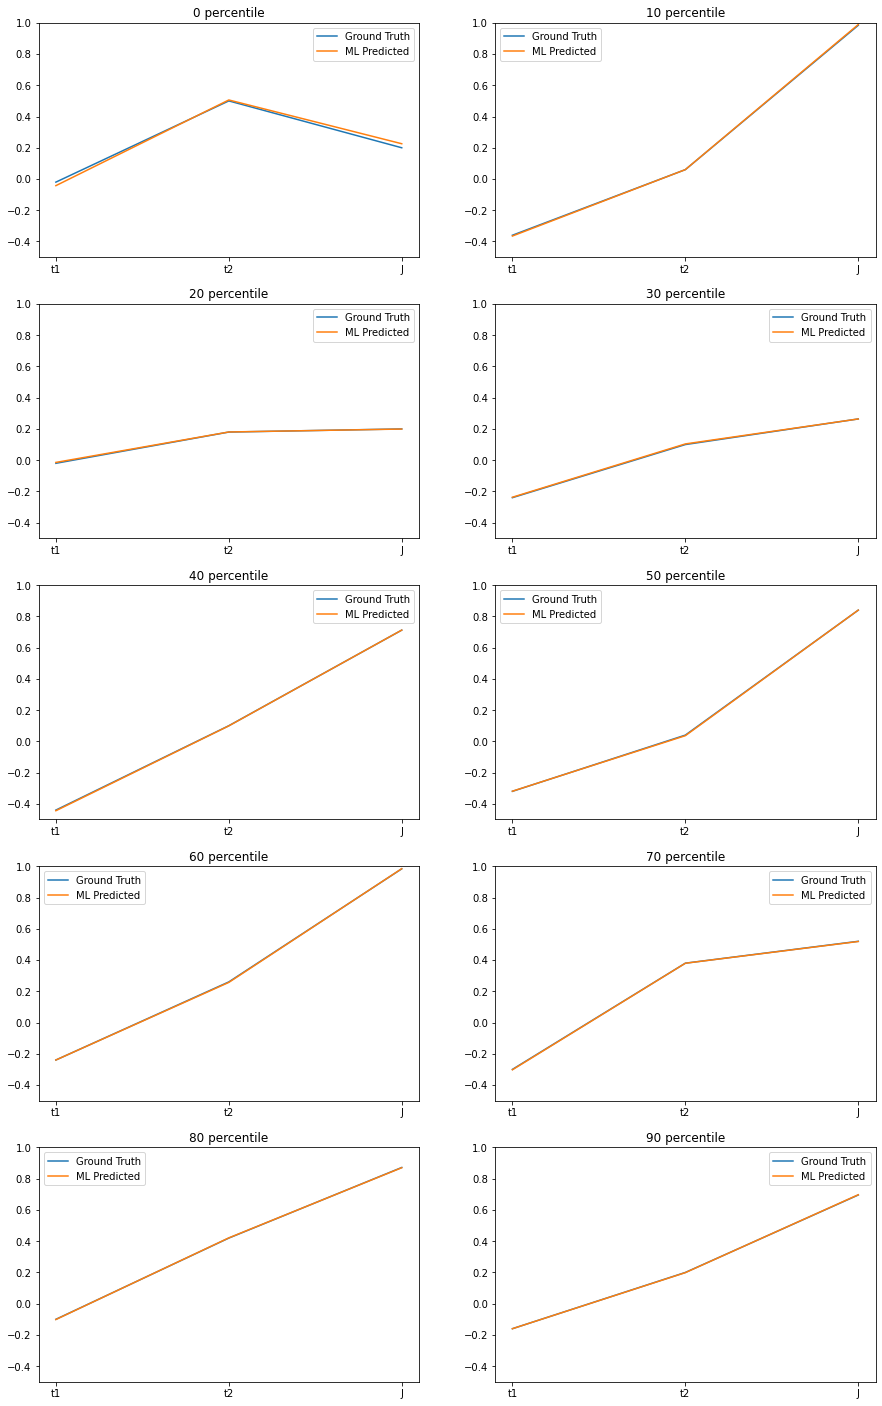

In [8]:
percentiles = see_results(predicted = predicted, 
            truth = data.test_y, 
            grid_shape = (5, 2), 
            percentiles = np.arange(0, 100, 10), 
            x_vals = np.arange(3), 
            tick_labels = ['t1', 't2', 'J'], 
            same_ylim = True)

We can also use the returned percentiles to get the same information above in printed values

In [12]:
for i, (mse, predicted, truth) in enumerate(percentiles):
    print(f"Percentile {10 * i}")
    print(f"ground truth: t': {truth[0]}, t'': {truth[1]}, J: {truth[2]}")
    print(f"predicted: t': {predicted[0]:.4f}, t'': {predicted[1]:.4f}, J: {predicted[2]:.4f}")
    print()

Percentile 0
ground truth: t': -0.02, t'': 0.5, J: 0.2
predicted: t': -0.0426, t'': 0.5060, J: 0.2259

Percentile 10
ground truth: t': -0.36, t'': 0.06, J: 0.984
predicted: t': -0.3651, t'': 0.0601, J: 0.9889

Percentile 20
ground truth: t': -0.02, t'': 0.18, J: 0.2
predicted: t': -0.0143, t'': 0.1806, J: 0.1993

Percentile 30
ground truth: t': -0.24, t'': 0.1, J: 0.264
predicted: t': -0.2372, t'': 0.1040, J: 0.2639

Percentile 40
ground truth: t': -0.44, t'': 0.1, J: 0.712
predicted: t': -0.4442, t'': 0.0990, J: 0.7122

Percentile 50
ground truth: t': -0.32, t'': 0.04, J: 0.84
predicted: t': -0.3191, t'': 0.0363, J: 0.8402

Percentile 60
ground truth: t': -0.24, t'': 0.26, J: 0.984
predicted: t': -0.2401, t'': 0.2568, J: 0.9848

Percentile 70
ground truth: t': -0.3, t'': 0.38, J: 0.52
predicted: t': -0.3025, t'': 0.3794, J: 0.5188

Percentile 80
ground truth: t': -0.1, t'': 0.42, J: 0.872
predicted: t': -0.1014, t'': 0.4213, J: 0.8705

Percentile 90
ground truth: t': -0.16, t'': 0.2, 